In [41]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import OneClassSVM
from numpy import where
import operator
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model

In [25]:
# Load the dataset
data_url = "housing.csv"
housing_data = pd.read_csv(data_url)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(housing_data.head())

# Display basic information about the dataset
print("\nDataset information:")
print(housing_data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(housing_data.describe())

# Check for missing values
print("\nMissing values:")
print(housing_data.isnull().sum())

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset information:
<class 'pandas.core.fram

In [2]:
# Drop rows with missing values
housing_data = housing_data.dropna()

# Filter out rows with 'island' in the ocean_proximity column
housing_data = housing_data[housing_data['ocean_proximity'] != 'ISLAND']

# Display the shape of the cleaned dataset
print("Shape of cleaned dataset:", housing_data.shape)

Shape of cleaned dataset: (20428, 10)


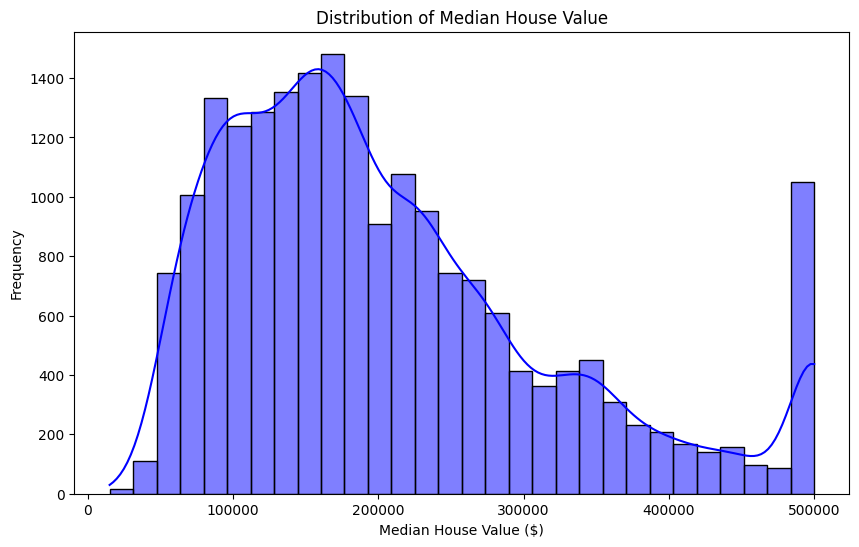

In [3]:

# Visualizing the distribution of target variable 'median_house_value'
plt.figure(figsize=(10, 6))
sns.histplot(data=housing_data, x='median_house_value', bins=30, kde=True, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.show()

/var/folders/8g/wksj3t495bddclbtb3_d2jxh0000gn/T/ipykernel_5463/1755451238.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


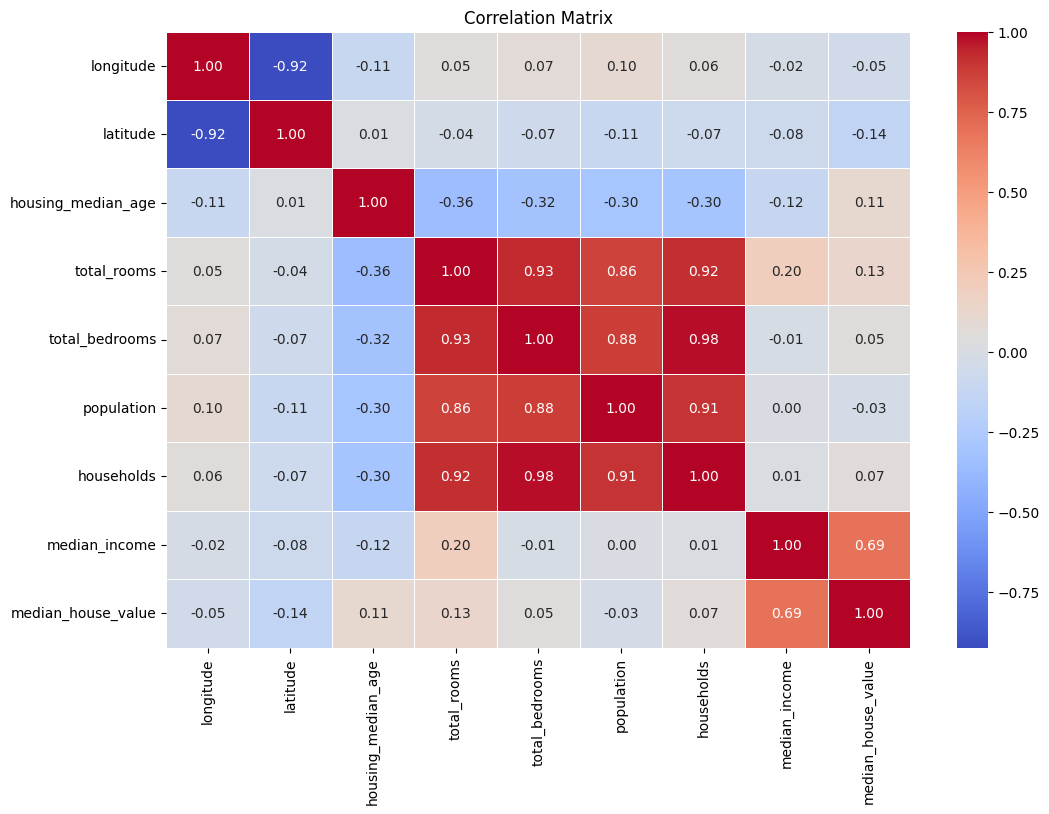

In [4]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

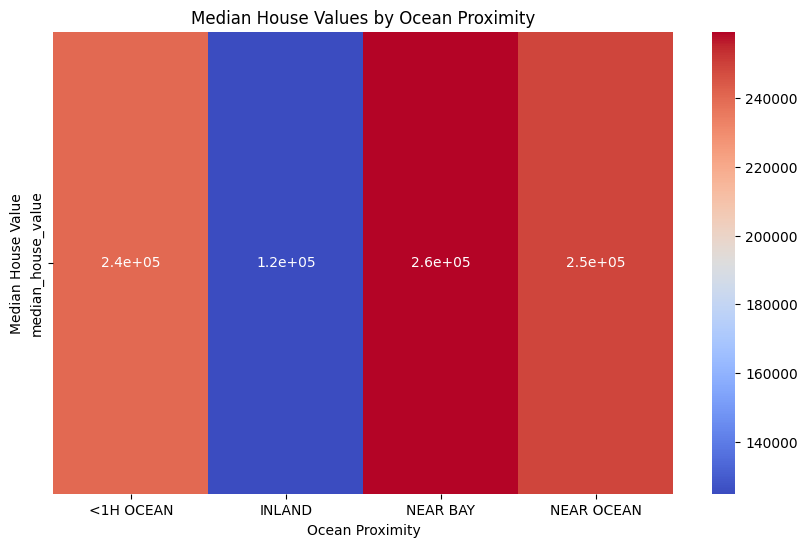

In [5]:

# Calculate median house values for each category of ocean proximity
median_values = housing_data.groupby('ocean_proximity')['median_house_value'].median().reset_index()

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(pd.pivot_table(housing_data, values='median_house_value', index=None, columns='ocean_proximity'), annot=True, cmap='coolwarm')
heatmap.set_title('Median House Values by Ocean Proximity')
heatmap.set_xlabel('Ocean Proximity')
heatmap.set_ylabel('Median House Value')

plt.show()

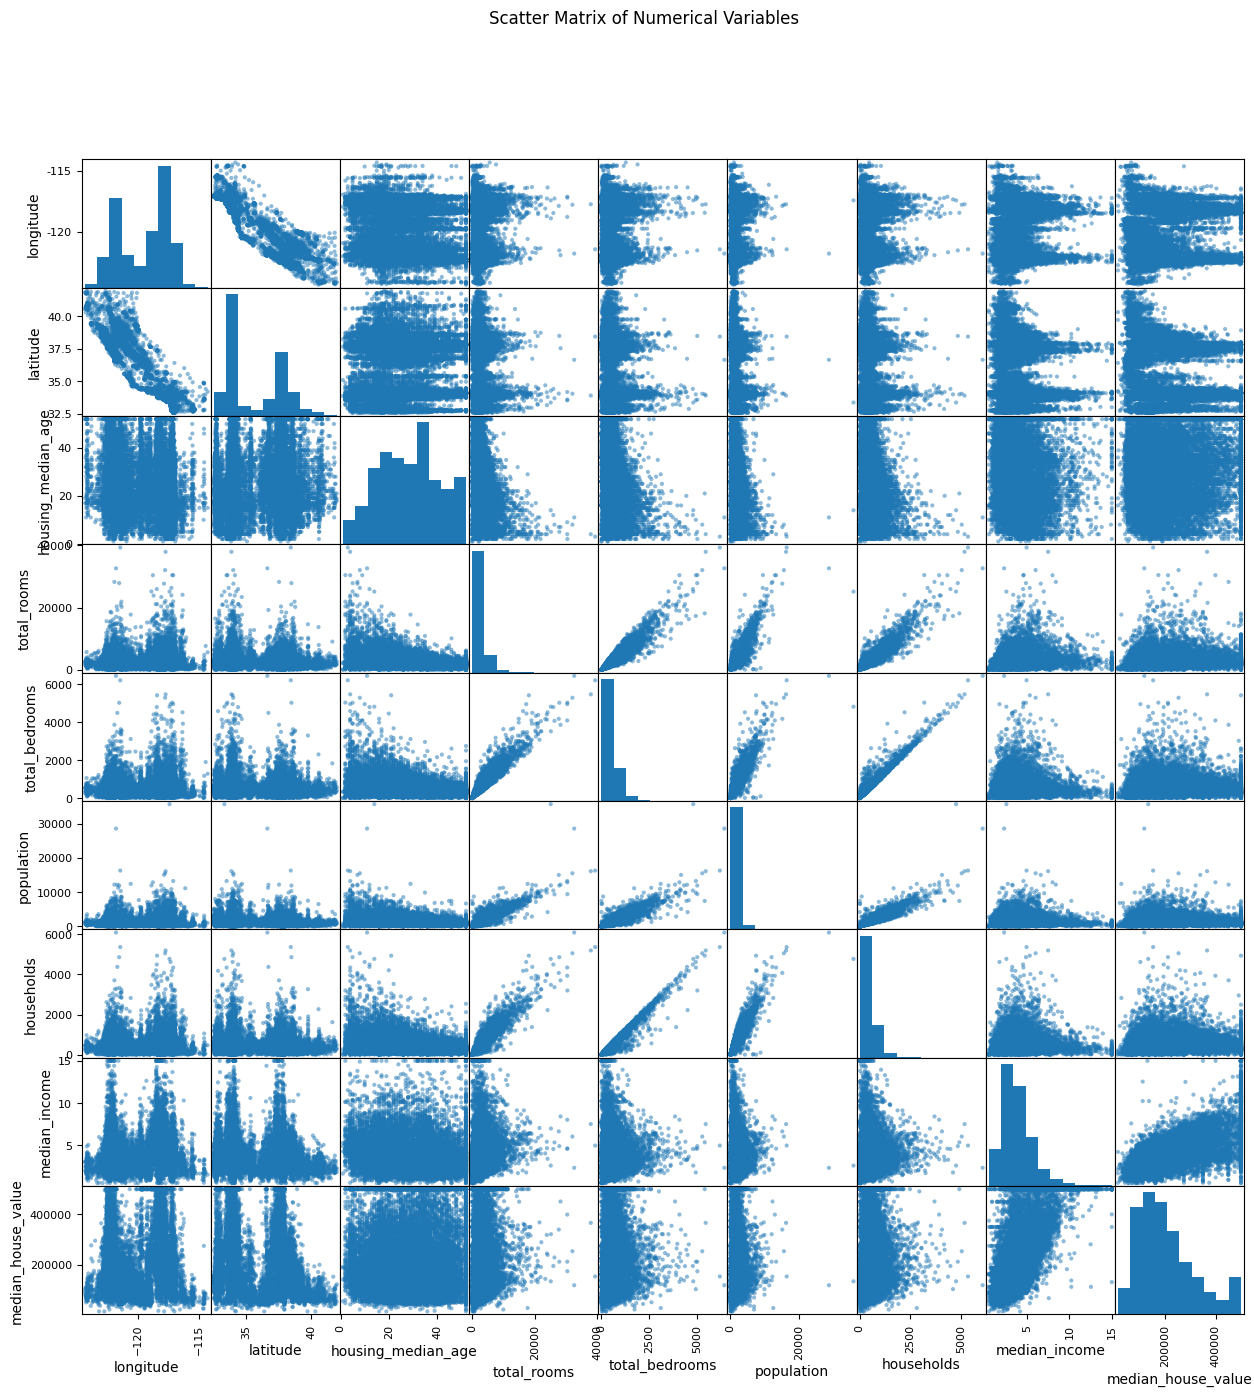

In [6]:

# Importing necessary library
from pandas.plotting import scatter_matrix

# Selecting numerical columns for scatter matrix
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Creating scatter matrix
scatter_matrix(housing_data[numerical_columns], figsize=(15, 15))
plt.suptitle('Scatter Matrix of Numerical Variables')
plt.show()

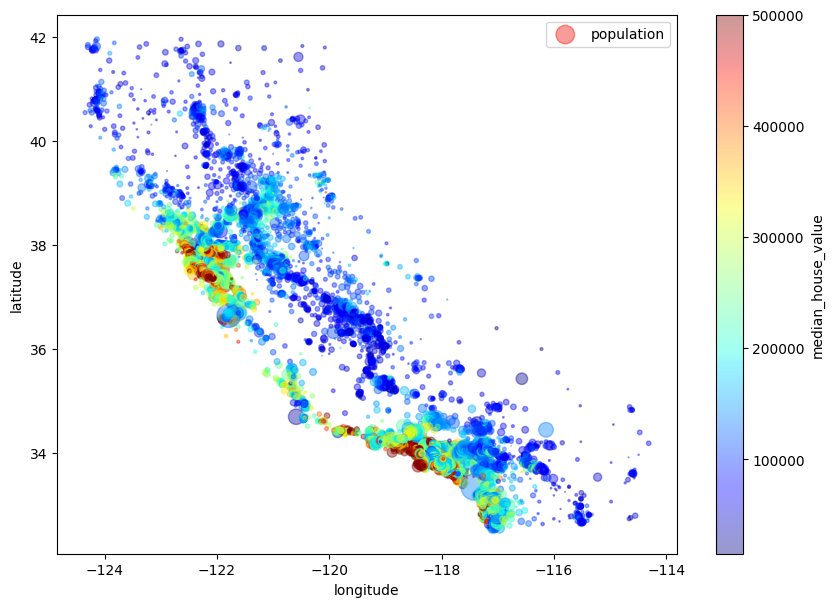

In [7]:

#Visulization

housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing_data["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [13]:
data = pd.read_csv("housing.csv")
data = data.dropna()
data = data[data['ocean_proximity'] != 'ISLAND']

oec = OneHotEncoder()
ocean_proximity_encoded = oec.fit_transform(data[['ocean_proximity']]).toarray()


columns = oec.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=columns)

ocean_proximity_df.index = data.index

normalizedData = pd.DataFrame()
scaler = MinMaxScaler()
for i in range(data.shape[1]-1):
    normalData = scaler.fit_transform(data.iloc[:, i].values.reshape(-1, 1))
    normalizedData[data.columns[i]] = pd.Series(np.ravel(normalData))
normalizedData.index = data.index

data = pd.concat([normalizedData, ocean_proximity_df], axis=1)
data, median_house_value = data.drop(["median_house_value"], axis=1), data[["median_house_value"]]
display(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0


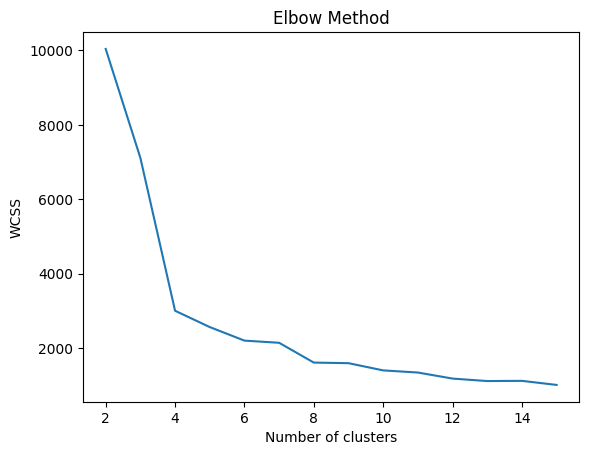

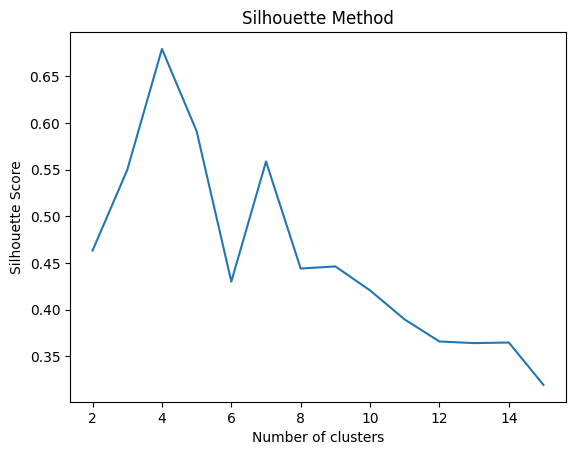

In [9]:
wcss = []
silhouette_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans_result = kmeans.fit(np.asarray(data))
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    
plt.plot(range(2, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.plot(range(2, 16), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

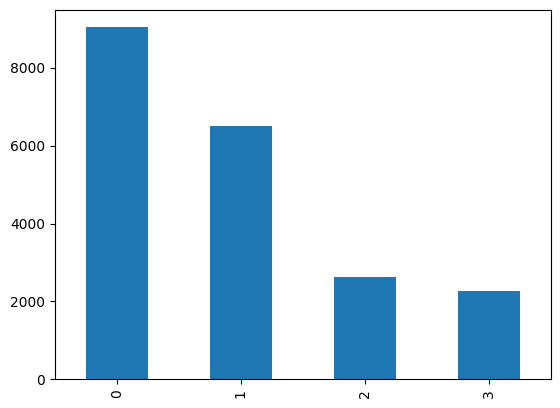

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, n_init="auto")
kmeans_result = kmeans.fit(np.asarray(data))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()

_ = kmeans_distribution.plot(kind='bar')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,Label
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,1.0,0.0,0.902266,3
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,1.0,0.0,0.708247,3
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,1.0,0.0,0.695051,3
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,1.0,0.0,0.672783,3
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,1.0,0.0,0.674638,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.130105,1
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.128043,1
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.159383,1
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.143713,1


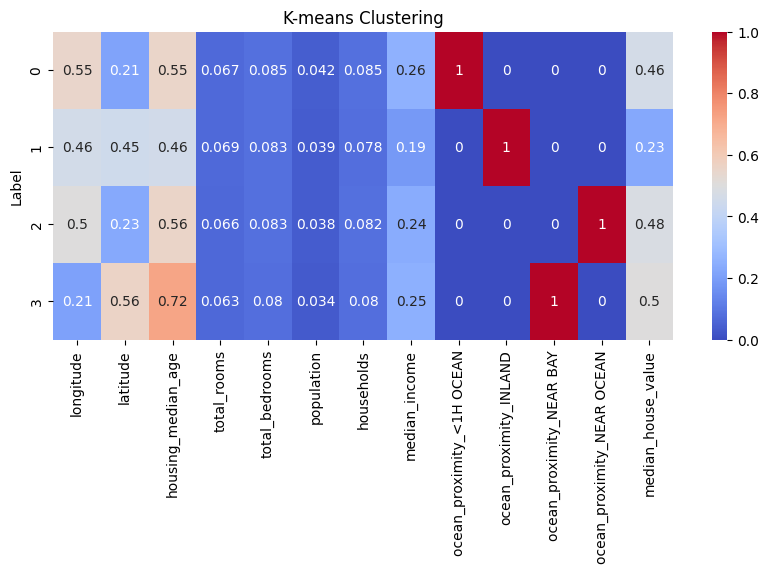

In [11]:
kmeans_clustering.index = data.index
data["median_house_value"] = median_house_value
data["Label"] = kmeans_clustering
display(data)
data_grouped = data.groupby("Label").mean()


plt.figure(figsize=(10, 4))
sns.heatmap(data_grouped, cmap='coolwarm', annot=True)
plt.title('K-means Clustering')
plt.show()

In [20]:
# importing data from csv file to dataframe using pandas library
data = pd.read_csv('housing.csv')
display(data)

print('\nColumn names in the dataset:')
data.columns

data.info()
## drop the missing vale datapoint
data.dropna(inplace=True)

oec = OneHotEncoder()
ocean_proximity_encoded = oec.fit_transform(data[['ocean_proximity']]).toarray()

columns = oec.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=columns)

ocean_proximity_df.index = data.index


## drop two columns (ocean_proximity and median_house_value)
## because we add onehotencoder for ocean_proximity
## and we need to predict median house value
X = pd.concat([data.drop(['ocean_proximity', 'median_house_value'], axis=1), ocean_proximity_df], axis=1)
y = data['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND



Column names in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

## train model
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.8227744217846039

In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Squared Error: 2309164128.417982
Root Mean Squared Error: 48053.76289551092
R2: 0.8227744217846039


In [27]:
## update the default parameters of the model to get a better model
parameters = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [10, 20, 30, 40, 50],  
    'min_samples_split': [2, 3, 4, 5, 7, 10],  
    'min_samples_leaf': [1, 2, 3, 4, 5], 
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=parameters, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, 
                                   scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=400; 

/Users/frankieglaviano/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, max

/Users/frankieglaviano/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/frankieglaviano/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/frankieglaviano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/frankieglaviano/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_para

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=300; total time=   5.9s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  10.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_depth=10, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 7,
                                                              10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [29]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse_new = mean_squared_error(y_test, y_pred)
rmse_new = sqrt(mse_new)
r2_new = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

print(f"New Mean Squared Error: {mse_new}")
print(f"New Root Mean Squared Error: {rmse_new}")
print(f"New R2: {r2_new}")

Mean Squared Error: 2309164128.417982
Root Mean Squared Error: 48053.76289551092
R2: 0.8227744217846039
New Mean Squared Error: 2369448451.300602
New Root Mean Squared Error: 48676.980712659264
New R2: 0.8181476722830362


In [32]:

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()

## train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model.score(X_test,y_test)

0.6448249189488042

In [38]:
# @title Simple Linear Regression: Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error and R2 values
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Absolute Error: 50830.842880662
Mean Squared Error: 4798943310.377502
Root Mean Squared Error: 69274.40588252997
R2: 0.6448249189488042


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape
y_test.shape
reg_model = linear_model.LinearRegression()


#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [43]:
#Printing the model coefficients
print('Intercept: ', reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -2285653.392367535


[('longitude', -27296.878990967987),
 ('latitude', -26015.17154900334),
 ('housing_median_age', 1075.2181091018574),
 ('total_rooms', -5.765010325318144),
 ('total_bedrooms', 92.92649987053028),
 ('population', -43.734663407711196),
 ('households', 68.51263116695554),
 ('median_income', 39343.01442073932),
 ('ocean_proximity_<1H OCEAN', -22219.049652296242),
 ('ocean_proximity_INLAND', -60694.16799950372),
 ('ocean_proximity_ISLAND', 129925.11142792072),
 ('ocean_proximity_NEAR BAY', -28006.101469651017),
 ('ocean_proximity_NEAR OCEAN', -19005.792306469742)]

In [44]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)


print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 91098.18602023 256405.47273582 278286.56268389 ... 227627.6350591
 307754.21994388 152604.56464784]


In [45]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
12627,72300.0,91098.186020
10628,227800.0,256405.472736
8556,363800.0,278286.562684
16313,151900.0,250276.919666
9761,274600.0,290995.304283
...,...,...
14292,203200.0,210752.071798
11561,177700.0,166874.434647
12066,339300.0,227627.635059
8293,381000.0,307754.219944


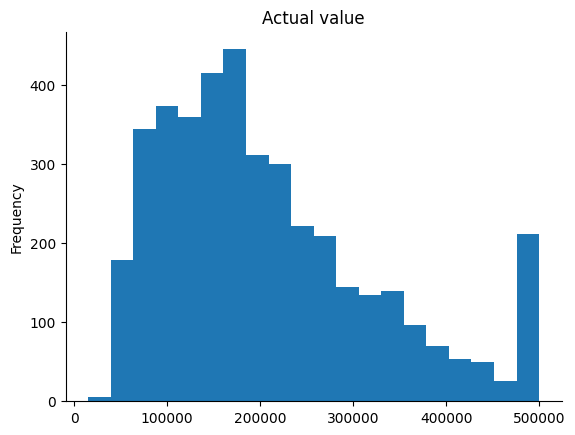

In [46]:
# @title Actual value

from matplotlib import pyplot as plt
reg_model_diff['Actual value'].plot(kind='hist', bins=20, title='Actual value')
plt.gca().spines[['top', 'right',]].set_visible(False)

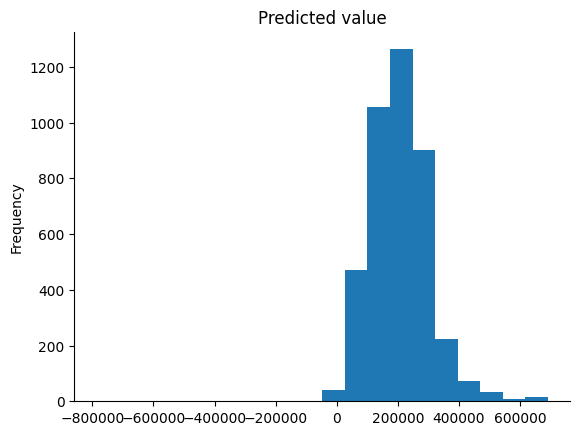

In [47]:
# @title Predicted value

from matplotlib import pyplot as plt
reg_model_diff['Predicted value'].plot(kind='hist', bins=20, title='Predicted value')
plt.gca().spines[['top', 'right',]].set_visible(False)

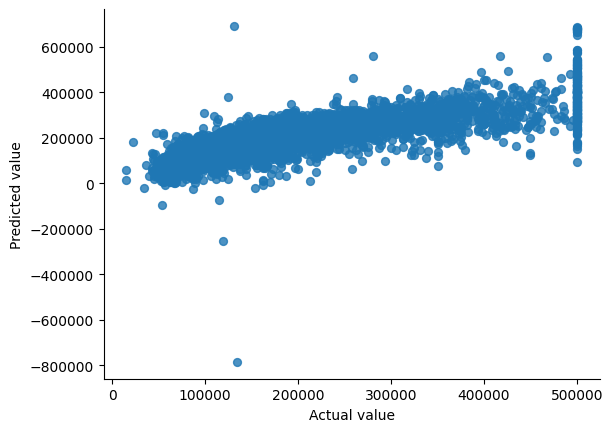

In [48]:
# @title Actual value vs Predicted value

from matplotlib import pyplot as plt
reg_model_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [49]:

# @title Multiple Linear Regression: Mean Absolute Error, Mean Squared Error, Root Meaan Squared Error and R2 values
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

Mean Absolute Error: 50387.599899573914
Mean Square Error: 5017152997.986145
Root Mean Squared Error: 70831.86428427637
R2: 0.6292323539331903
